In [82]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Load and preprocess data
books_path = "BX-Books.csv"
ratings_path = "BX-Book-Ratings.csv"

df_books = pd.read_csv(
    books_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [84]:
df_ratings = df_ratings[df_ratings['rating']!=0]
dataset = pd.merge(df_ratings,df_books, on=['isbn'])
# lower case format
dataset_lowercase=dataset.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
dataset_lowercase.head()


,user,isbn,rating,title,author
0,276726,0155061224,5.0,rites of passage,judith rae
1,276729,052165615x,3.0,help!: level 1,philip prowse
2,276729,0521795028,6.0,the amsterdam connection : level 4 (cambridge ...,sue leather
3,276744,038550120x,7.0,a painted house,john grisham
4,11676,038550120x,10.0,a painted house,john grisham


In [85]:
# define Tolkien fan readers group
# by title, author, rating > 7
tolkien_readers = dataset_lowercase['user'][(dataset_lowercase['title']=='the fellowship of the ring (the lord of the rings, part 1)') 
                & (dataset_lowercase['author'].str.contains("tolkien")) & (dataset_lowercase['rating'] > 7)]
# gerenate a list and delete duplicates
tolkien_readers = np.unique(tolkien_readers)

In [86]:
books_of_tolkien_readers = dataset_lowercase[(dataset_lowercase['user'].isin(tolkien_readers))].reset_index()

In [87]:
books_of_tolkien_readers.shape

(19317, 6)

In [88]:
books_of_tolkien_readers["rating"].value_counts()


8.0     4674
10.0    4051
9.0     3733
7.0     3138
5.0     1491
6.0     1394
4.0      356
3.0      233
1.0      128
2.0      119
Name: rating, dtype: int64

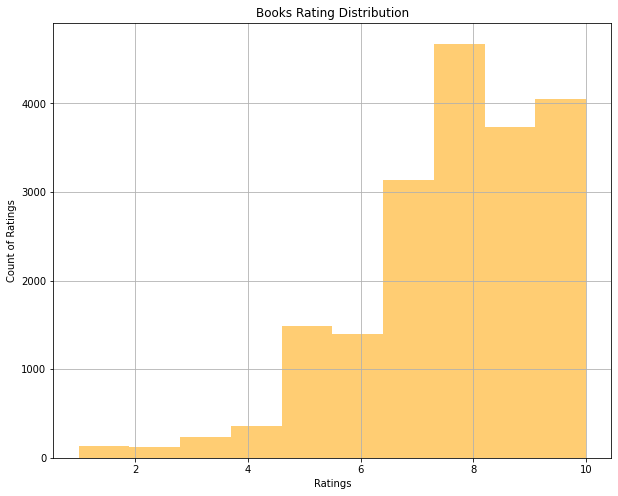

In [89]:
#plot distribution of ratings
plt.figure(figsize=(10,8))
plt.hist(books_of_tolkien_readers["rating"], color="orange", alpha=0.55)
plt.grid(True)
plt.xlabel("Ratings")
plt.ylabel("Count of Ratings")
plt.title("Books Rating Distribution")
plt.show()

In [101]:
# Number of ratings per other books in dataset
number_of_rating_per_book = books_of_tolkien_readers.groupby(['title']).count().reset_index().sort_values("rating",ascending=False).set_index("title")

# for analysis purposes
number_of_rating_per_book_analysis = books_of_tolkien_readers.groupby(['title']).count().reset_index().sort_values("rating",ascending=False).set_index("title").head(10)
number_of_rating_per_book_analysis

,index,user,isbn,rating,author
title,,,,,
"the fellowship of the ring (the lord of the rings, part 1)",178,178,178,178,178
"the two towers (the lord of the rings, part 2)",71,71,71,71,71
"the return of the king (the lord of the rings, part 3)",66,66,66,66,66
the hobbit : the enchanting prelude to the lord of the rings,32,32,32,32,32
harry potter and the chamber of secrets (book 2),32,32,32,32,32
harry potter and the prisoner of azkaban (book 3),29,29,29,29,29
harry potter and the goblet of fire (book 4),27,27,27,27,27
harry potter and the sorcerer's stone (book 1),19,19,19,19,19
harry potter and the order of the phoenix (book 5),18,18,18,18,18


f:\#My Python\Django Projects\My Projects\BookRecommender\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Most Rated Books')

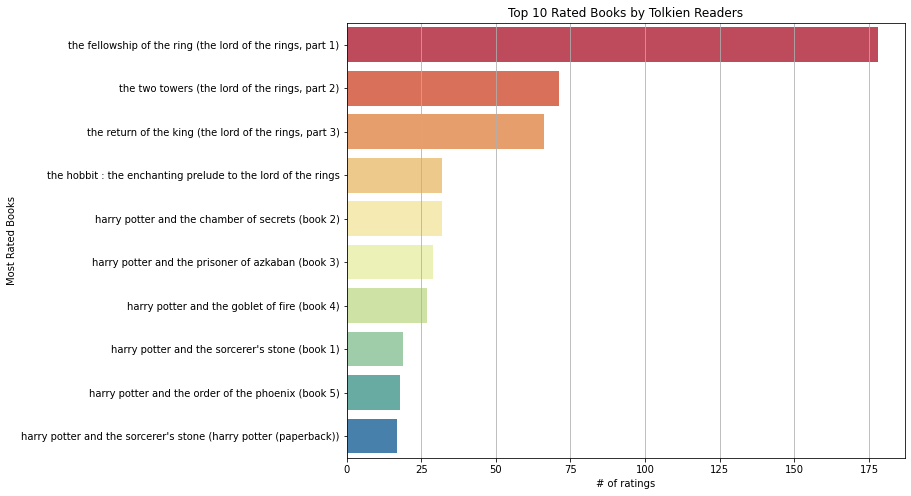

In [98]:

plt.figure(figsize=(10,8))
plt.grid(True)
bar_chart = sns.barplot(number_of_rating_per_book_analysis.rating,number_of_rating_per_book_analysis.index, palette="Spectral" )
bar_chart.set_title("Top 10 Rated Books by Tolkien Readers")
bar_chart.set_xlabel("# of ratings")
bar_chart.set_ylabel("Most Rated Books")

In [102]:
number_of_rating_per_book

,index,user,isbn,rating,author
title,,,,,
"the fellowship of the ring (the lord of the rings, part 1)",178,178,178,178,178
"the two towers (the lord of the rings, part 2)",71,71,71,71,71
"the return of the king (the lord of the rings, part 3)",66,66,66,66,66
the hobbit : the enchanting prelude to the lord of the rings,32,32,32,32,32
harry potter and the chamber of secrets (book 2),32,32,32,32,32
...,...,...,...,...,...
how to grandparent,1,1,1,1,1
how to have a great retirement on a limited budget,1,1,1,1,1
how to have a green thumb without an aching back: a new method of mulch gardening,1,1,1,1,1


In [110]:
#select only books which have actually higher number of ratings than threshold
books_to_compare = number_of_rating_per_book.index[number_of_rating_per_book["user"] >= 10]
books_to_compare

Index(['the fellowship of the ring (the lord of the rings, part 1)',
       'the two towers (the lord of the rings, part 2)',
       'the return of the king (the lord of the rings, part 3)',
       'the hobbit : the enchanting prelude to the lord of the rings',
       'harry potter and the chamber of secrets (book 2)',
       'harry potter and the prisoner of azkaban (book 3)',
       'harry potter and the goblet of fire (book 4)',
       'harry potter and the sorcerer's stone (book 1)',
       'harry potter and the order of the phoenix (book 5)',
       'harry potter and the sorcerer's stone (harry potter (paperback))',
       'the secret life of bees', 'bridget jones's diary', 'the da vinci code',
       'to kill a mockingbird', 'the hobbit: or there and back again',
       'the tale of the body thief (vampire chronicles (paperback))',
       'life of pi', 'it', 'ender's game (ender wiggins saga (paperback))',
       'dreamcatcher', 'a wrinkle in time',
       'the hitchhiker's guide

In [111]:
books_to_compare = books_to_compare.tolist()


In [114]:
ratings_data_raw = books_of_tolkien_readers[['user', 'rating', 'title']][books_of_tolkien_readers['title'].isin(books_to_compare)]

In [115]:
ratings_data_raw

,user,rating,title
10,30711,8.0,harry potter and the order of the phoenix (boo...
11,52350,9.0,harry potter and the order of the phoenix (boo...
12,87938,8.0,harry potter and the order of the phoenix (boo...
13,88733,8.0,harry potter and the order of the phoenix (boo...
14,105221,10.0,harry potter and the order of the phoenix (boo...
...,...,...,...
16632,138995,10.0,harry potter and the sorcerer's stone (book 1)
18999,237451,8.0,the fellowship of the ring (the lord of the ri...
19000,237451,9.0,"the return of the king (the lord of the rings,..."
19001,237451,10.0,"the two towers (the lord of the rings, part 2)"


In [116]:
# group by User and Book and compute mean
ratings_data_raw_nodup = ratings_data_raw.groupby(['user', 'title'])['rating'].mean()

In [119]:
ratings_data_raw_nodup

user    title                                                      
254     harry potter and the chamber of secrets (book 2)                9.0
        harry potter and the goblet of fire (book 4)                    9.0
        harry potter and the prisoner of azkaban (book 3)               9.0
        harry potter and the sorcerer's stone (book 1)                  9.0
        the fellowship of the ring (the lord of the rings, part 1)      8.0
                                                                       ... 
276050  the tale of the body thief (vampire chronicles (paperback))     5.0
        the two towers (the lord of the rings, part 2)                 10.0
276313  the fellowship of the ring (the lord of the rings, part 1)      8.0
278246  the fellowship of the ring (the lord of the rings, part 1)      8.0
278550  the fellowship of the ring (the lord of the rings, part 1)     10.0
Name: rating, Length: 654, dtype: float32

In [120]:
# reset index to see User-ID in every row
ratings_data_raw_nodup = ratings_data_raw_nodup.to_frame().reset_index()

In [121]:
ratings_data_raw_nodup

,user,title,rating
0,254,harry potter and the chamber of secrets (book 2),9.0
1,254,harry potter and the goblet of fire (book 4),9.0
2,254,harry potter and the prisoner of azkaban (book 3),9.0
3,254,harry potter and the sorcerer's stone (book 1),9.0
4,254,the fellowship of the ring (the lord of the ri...,8.0
...,...,...,...
649,276050,the tale of the body thief (vampire chronicles...,5.0
650,276050,"the two towers (the lord of the rings, part 2)",10.0
651,276313,the fellowship of the ring (the lord of the ri...,8.0
652,278246,the fellowship of the ring (the lord of the ri...,8.0


In [130]:
dataset_for_corr = ratings_data_raw_nodup.pivot(index='user', columns='title', values='rating').fillna(0).T

In [131]:
dataset_for_corr

user,254,1674,11676,11944,13191,16601,16777,16795,17725,22818,...,265498,266914,267568,271176,274393,275218,276050,276313,278246,278550
title,,,,,,,,,,,,,,,,,,,,,
a wrinkle in time,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bridget jones's diary,0.0,0.0,6.333333,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dreamcatcher,0.0,0.0,8.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ender's game (ender wiggins saga (paperback)),0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
fahrenheit 451,0.0,0.0,8.000000,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
harry potter and the chamber of secrets (book 2),9.0,0.0,9.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
harry potter and the goblet of fire (book 4),9.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
harry potter and the order of the phoenix (book 5),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
harry potter and the prisoner of azkaban (book 3),9.0,0.0,7.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
LoR_list = ['the fellowship of the ring (the lord of the rings, part 1)']

result_list = []
worst_list = []

for LoR_book in LoR_list:
    
    #Take out the Lord of the Rings selected book from correlation dataframe
    dataset_of_other_books = dataset_for_corr.copy(deep=False)
    dataset_of_other_books.drop([LoR_book], axis=1, inplace=True)
      
    # empty lists
    book_titles = []
    correlations = []
    avgrating = []

    # corr computation
    for book_title in list(dataset_of_other_books.columns.values):
        book_titles.append(book_title)
        correlations.append(dataset_for_corr[LoR_book].corr(dataset_of_other_books[book_title]))
        tab=(ratings_data_raw[ratings_data_raw['title']==book_title].groupby(ratings_data_raw['title']).mean())
        avgrating.append(tab['rating'].min())
    # final dataframe of all correlation of each book   
    corr_fellowship = pd.DataFrame(list(zip(book_titles, correlations, avgrating)), columns=['book','corr','avg_rating'])
    corr_fellowship.head()

    # top 10 books with highest corr
    result_list.append(corr_fellowship.sort_values('corr', ascending = False).head(10))
    
    #worst 10 books
    worst_list.append(corr_fellowship.sort_values('corr', ascending = False).tail(10))

result_list

KeyError: "['the fellowship of the ring (the lord of the rings, part 1)'] not found in axis"